### import modules and dependencies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl

In [14]:
stock = pd.read_csv('../data_derived/vcfs-intersection/GD3_stock_intersection.csv', sep='\t')

stock = stock[['SNP', 'POS_x', '%']]
stock['%'] = stock['%']*100

# stock

In [17]:
stock_PB2 = stock.loc[stock['SNP'].str.contains("PB2")]
stock_PB1 = stock.loc[stock['SNP'].str.contains("PB1")]
stock_PA = stock.loc[stock['SNP'].str.contains("PA")]
stock_HA = stock.loc[stock['SNP'].str.contains("HA")]
stock_NP = stock.loc[stock['SNP'].str.contains("NP")]
stock_NA = stock.loc[stock['SNP'].str.contains("NA")]
stock_MP = stock.loc[stock['SNP'].str.contains("MP")]
stock_NS = stock.loc[stock['SNP'].str.contains("NS")]


stock_PB2_syn = stock_PB2.loc[stock_PB2['SNP'].str.contains("syn")]
stock_PB2_nonsyn = stock_PB2.loc[~stock_PB2['SNP'].str.contains("syn")]

stock_PB1_syn = stock_PB1.loc[stock_PB1['SNP'].str.contains("syn")]
stock_PB1_nonsyn = stock_PB1.loc[~stock_PB1['SNP'].str.contains("syn")]

stock_PA_syn = stock_PA.loc[stock_PA['SNP'].str.contains("syn")]
stock_PA_nonsyn = stock_PA.loc[~stock_PA['SNP'].str.contains("syn")]

stock_HA_syn = stock_HA.loc[stock_HA['SNP'].str.contains("syn")]
stock_HA_nonsyn = stock_HA.loc[~stock_HA['SNP'].str.contains("syn")]

stock_NP_syn = stock_NP.loc[stock_NP['SNP'].str.contains("syn")]
stock_NP_nonsyn = stock_NP.loc[~stock_NP['SNP'].str.contains("syn")]

stock_NA_syn = stock_NA.loc[stock_NA['SNP'].str.contains("syn")]
stock_NA_nonsyn = stock_NA.loc[~stock_NA['SNP'].str.contains("syn")]

stock_MP_syn = stock_MP.loc[stock_MP['SNP'].str.contains("syn")]
stock_MP_nonsyn = stock_MP.loc[~stock_MP['SNP'].str.contains("syn")]

stock_NS_syn = stock_NS.loc[stock_NS['SNP'].str.contains("syn")]
stock_NS_nonsyn = stock_NS.loc[~stock_NS['SNP'].str.contains("syn")]

/var/folders/z0/kk69g_d50cl7mcvk541j4_9r0000gs/T/ipykernel_66923/2428380081.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


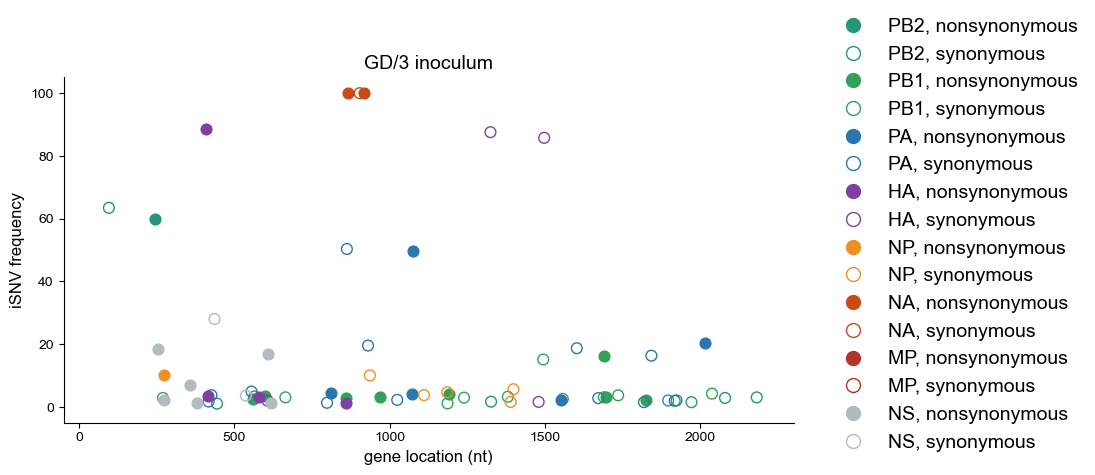

In [37]:
# define hex colors
PB2 = '#25957A'
PB1 = '#31A258'
PA = '#2977AE'
HA = '#8040A1'
NP = '#EE9026'
NA = '#C84B17'
MP = '#B43329'
NS = '#B4BBC0'

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0,0:8]) #PB2

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
    
# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

ax1.set_title('GD/3 inoculum', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(-5,105)
ax1.set_xlim(-50,2300)
ax1.set_xticks([0, 500, 1000, 1500, 2000])

ax1.scatter(x=stock_PB2_syn['POS_x'], y=stock_PB2_syn['%'], marker='o', facecolors='none', s=60, edgecolors=PB2)
ax1.scatter(x=stock_PB2_nonsyn['POS_x'], y=stock_PB2_nonsyn['%'], marker='o', facecolors=PB2, s=60, edgecolors=PB2)

ax1.scatter(x=stock_PB1_syn['POS_x'], y=stock_PB1_syn['%'], marker='o', facecolors='none', s=60, edgecolors=PB1)
ax1.scatter(x=stock_PB1_nonsyn['POS_x'], y=stock_PB1_nonsyn['%'], marker='o', facecolors=PB1, s=60, edgecolors=PB1)

ax1.scatter(x=stock_PA_syn['POS_x'], y=stock_PA_syn['%'], marker='o', facecolors='none', s=60, edgecolors=PA)
ax1.scatter(x=stock_PA_nonsyn['POS_x'], y=stock_PA_nonsyn['%'], marker='o', facecolors=PA, s=60, edgecolors=PA)

ax1.scatter(x=stock_HA_syn['POS_x'], y=stock_HA_syn['%'], marker='o', facecolors='none', s=60, edgecolors=HA)
ax1.scatter(x=stock_HA_nonsyn['POS_x'], y=stock_HA_nonsyn['%'], marker='o', facecolors=HA, s=60, edgecolors=HA)

ax1.scatter(x=stock_NP_syn['POS_x'], y=stock_NP_syn['%'], marker='o', facecolors='none',s=60,  edgecolors=NP)
ax1.scatter(x=stock_NP_nonsyn['POS_x'], y=stock_NP_nonsyn['%'], marker='o', facecolors=NP, s=60, edgecolors=NP)

ax1.scatter(x=stock_NA_syn['POS_x'], y=stock_NA_syn['%'], marker='o', facecolors='none', s=60, edgecolors=NA)
ax1.scatter(x=stock_NA_nonsyn['POS_x'], y=stock_NA_nonsyn['%'], marker='o', facecolors=NA, s=60, edgecolors=NA)

ax1.scatter(x=stock_MP_syn['POS_x'], y=stock_MP_syn['%'], marker='o', facecolors='none', s=60, edgecolors=MP)
ax1.scatter(x=stock_MP_nonsyn['POS_x'], y=stock_MP_nonsyn['%'], marker='o', facecolors=MP, s=60, edgecolors=MP)

ax1.scatter(x=stock_NS_syn['POS_x'], y=stock_NS_syn['%'], marker='o', facecolors='none', s=60, edgecolors=NS)
ax1.scatter(x=stock_NS_nonsyn['POS_x'], y=stock_NS_nonsyn['%'], marker='o', facecolors=NS, s=60, edgecolors=NS)


ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# add a legend to this plot
PB2_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=PB2, markeredgecolor=PB2, linestyle='None', markersize=10, label='PB2, nonsynonymous')
PB2_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=PB2, linestyle='None', markersize=10, label='PB2, synonymous')

PB1_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=PB1, markeredgecolor=PB1, linestyle='None', markersize=10, label='PB1, nonsynonymous')
PB1_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=PB1, linestyle='None', markersize=10, label='PB1, synonymous')

PA_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=PA, markeredgecolor=PA, linestyle='None', markersize=10, label='PA, nonsynonymous')
PA_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=PA, linestyle='None', markersize=10, label='PA, synonymous')

HA_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=HA, markeredgecolor=HA, linestyle='None', markersize=10, label='HA, nonsynonymous')
HA_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=HA, linestyle='None', markersize=10, label='HA, synonymous')

NP_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=NP, markeredgecolor=NP, linestyle='None', markersize=10, label='NP, nonsynonymous')
NP_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=NP, linestyle='None', markersize=10, label='NP, synonymous')

NA_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=NA, markeredgecolor=NA, linestyle='None', markersize=10, label='NA, nonsynonymous')
NA_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=NA, linestyle='None', markersize=10, label='NA, synonymous')

MP_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=MP, markeredgecolor=MP, linestyle='None', markersize=10, label='MP, nonsynonymous')
MP_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=MP, linestyle='None', markersize=10, label='MP, synonymous')

NS_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=NS, markeredgecolor=NS, linestyle='None', markersize=10, label='NS, nonsynonymous')
NS_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=NS, linestyle='None', markersize=10, label='NS, synonymous')

fig.legend(handles=[PB2_nonsyn, PB2_syn, PB1_nonsyn, PB1_syn, PA_nonsyn, PA_syn, HA_nonsyn, HA_syn, NP_nonsyn, NP_syn, NA_nonsyn, NA_syn, MP_nonsyn, MP_syn, NS_nonsyn, NS_syn], frameon=False, fontsize=14, bbox_to_anchor=(1.1,1.05))

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/iSNVs_by_gene/stock.pdf", bbox_inches='tight', dpi=300)
fig.savefig("../figures/iSNVs_by_gene/stock.png", bbox_inches='tight', dpi=300)
